# Problem 3: *Errors in Numerical Differentiation*

Calculate the derivative of the function $f(x) = \sin(x)$ at the point $x = \pi/4$ using the first-order forward difference. Plot on a log-log plot the error with respect to the analytical derivative for a wide range of $\Delta x$. Describe the behavior you see (especially for very small $\Delta x$) and the reason for the trends. How does it change if you use a second-order central difference? How about a fourth-order central difference?

In [1]:
# SOLUTION

def d_first_forward(f, x: float, dx: float) -> float:
    """
    Computes the derivative of a passed function `f` around a point `x` for a
    given value of `dx` using forward differentiation.

    Parameters
    ----------
    f : function
        Function to derivate.
    x : float
        Point.
    dx : float
        Interval.

    Returns
    -------
    float
        Result of the derivative.
        
    """

    assert dx > 0, "Interval `dx` must be > 0."
        
    return (f(x + dx) - f(x)) / dx

In [2]:
# HELPER

import numpy as np

def error(true: float, actual: float) -> float:
    return np.abs(true - actual) / true

In [56]:
# RESULTS

f = np.sin
x = np.pi/4

true = np.cos(x) # true value of derivative at that point

# dxs = np.arange(np.pi/16, np.pi*4, np.pi/16)
dxs = np.logspace(-16, +5, 100) * np.pi
errors = []


for dx in dxs:
    errors.append(error(true, d_first_forward(f, x, dx)))
    
print(f'minimum error: {dxs[min(range(len(errors)), key=errors.__getitem__)]}')

minimum error: 8.344345866194938e-09


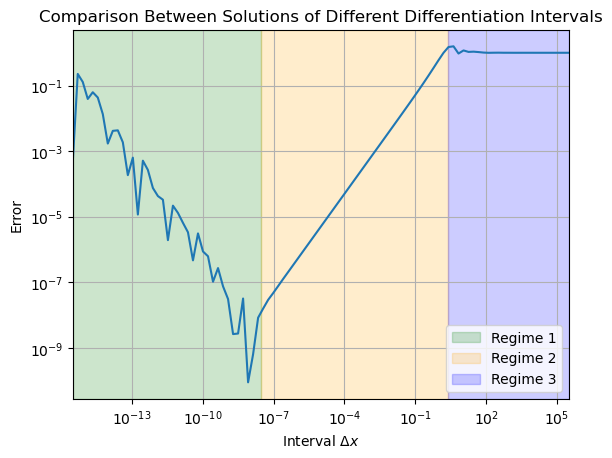

In [61]:
# PLOT

import matplotlib.pyplot as plt

plt.loglog(dxs, errors)

regimes = [dxs[0], 0.3*1e-7, 0.25*1e1, dxs[-1]]

plt.axvspan(regimes[0], regimes[1], alpha=0.2, color='green', label='Regime 1')
plt.axvspan(regimes[1], regimes[2], alpha=0.2, color='orange', label='Regime 2')
plt.axvspan(regimes[2], regimes[3], alpha=0.2, color='blue', label='Regime 3')

plt.xlabel("Interval $\\Delta x$")
plt.ylabel("Error")
plt.xlim(dxs[0], dxs[-1])

plt.title(f"Comparison Between Solutions of Different Differentiation Intervals")
plt.legend(loc='lower right')
plt.grid()
plt.show()

We have three clear regimes (shown approximately in the graph):

- **Regime 1:** For very small $\Delta x$, there is very noisy behavior present. That is because, in that interval, the difference between $f(x + \Delta x) - f(x)$ is small, so the subtraction gets rid of most of the leading terms, leaving only a tiny number with low precision (catastrophic cancellation). Additionally, we're dividing it by a small number $\Delta x$, which makes the errors more prominent. As the interval increases within this regime, the errors decrease, which makes sense because we're depending less on machine precision. We get closer to the true answer around $8 \times 10^{-9}$.

- **Regime 2:** At the start of regime 2, we're coming off of the lowest error and we increase the error as the interval increases. We're getting bigger and bigger intervals and we are slowly losing information because the points are getting too far from each other. This method gradually no longer approximates the local slope. This is a transition from regime 1 to regime 3.

- **Regime 3:** For large $\Delta x$, we're essentially not finding the derivative anymore. We're lost too much information in between points (extreme regime 2). The error also plateaus. This is because, since sine is a bounded function, $f(x+\Delta x) - f(x)$ always stays between $+2$ and $-2$. Even if our $\Delta x$ keeps growing, $$\lim_{\Delta x \to \infty} \frac{f(x+\Delta x) - f(x)}{\Delta x} = 0$$ everywhere.

In [83]:
# SOLUTION

def d_second_central(f, x: float, dx: float) -> float:
    """
    Computes the derivative of a passed function `f` around a point `x` for a
    given value of `dx` using second-order central differentiation.

    Parameters
    ----------
    f : function
        Function to derivate.
    x : float
        Point.
    dx : float
        Interval.

    Returns
    -------
    float
        Result of the derivative.
        
    """

    assert dx > 0, "Interval `dx` must be > 0."
        
    return (f(x + dx) - f(x - dx)) / (2*dx)

In [84]:
# RESULTS

errors = []

for dx in dxs:
    errors.append(error(true, d_second_central(f, x, dx)))
    
print(f'minimum error: {dxs[min(range(len(errors)), key=errors.__getitem__)]}')

minimum error: 1.103073415755545e-06


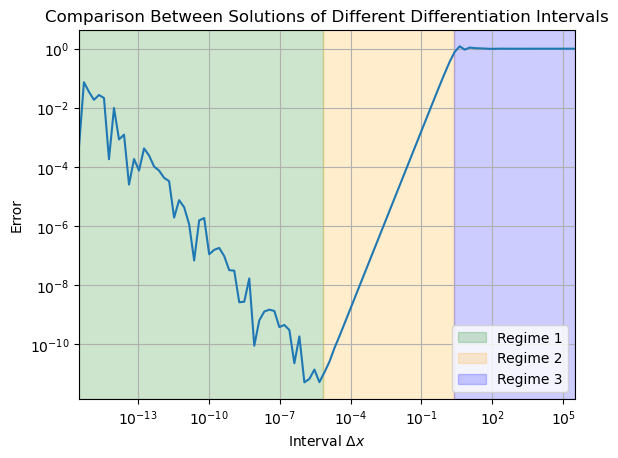

In [85]:
# PLOT

import matplotlib.pyplot as plt

plt.loglog(dxs, errors)

regimes = [dxs[0], 7e-6, 0.25*1e1, dxs[-1]]

plt.axvspan(regimes[0], regimes[1], alpha=0.2, color='green', label='Regime 1')
plt.axvspan(regimes[1], regimes[2], alpha=0.2, color='orange', label='Regime 2')
plt.axvspan(regimes[2], regimes[3], alpha=0.2, color='blue', label='Regime 3')

plt.xlabel("Interval $\\Delta x$")
plt.ylabel("Error")
plt.xlim(dxs[0], dxs[-1])

plt.title(f"Comparison Between Solutions of Different Differentiation Intervals")
plt.legend(loc='lower right')
plt.grid()
plt.show()

- **Regime 1:** Same as before: catastrophic cancellation dominates. The subtraction loses most of the significant digits, and dividing it by a small denominator amplifies the error. The error drops as the interval dominates as we depend less on machine precision. The error also goes lower than first-order forward differentiation.

- **Regime 2:** Same as before; only difference is that the regime starts for a bigger interval than before, allowing us to increase the interval a bit within regime 1 and still have small errors.

- **Regime 3:** Same as before.

To find the fourth-order central difference, we need five derivatives (and interpret each derivative as a variable, where we solve using a system of equations):
$$
f(x+\Delta x) = f(x) + \Delta x f'(x) + \frac{\Delta x^2}{2} f''(x) + \frac{\Delta x^3}{6} f'''(x) + \frac{\Delta x^4}{24} f^{(4)}(x) + \frac{\Delta x^5}{120} f^{(5)}(x) \\

f(x-\Delta x) = f(x) - \Delta x f'(x) + \frac{\Delta x^2}{2} f''(x) - \frac{\Delta x^3}{6} f'''(x) + \frac{\Delta x^4}{24} f^{(4)}(x) - \frac{\Delta x^5}{120} f^{(5)}(x) \\

f(x+2\Delta x) = f(x) + 2\Delta x f'(x) + 2\Delta x^2 f''(x) + \frac{4\Delta x^3}{3} f'''(x) + \frac{2\Delta x^4}{3} f^{(4)}(x) + \frac{4\Delta x^5}{15} f^{(5)}(x) \\

f(x-2\Delta x) = f(x) - 2\Delta x f'(x) + 2\Delta x^2 f''(x) - \frac{4\Delta x^3}{3} f'''(x) + \frac{2\Delta x^4}{3} f^{(4)}(x) - \frac{4\Delta x^5}{15} f^{(5)}(x)
$$

and so
$$
\begin{align*}
f'(x) &= \frac{8f(x+\Delta x) - 8f(x-\Delta x) - f(x+2\Delta x) + f(x-2\Delta x)}{12\Delta x} + \mathcal{O}(\Delta x^4)
\end{align*}
$$

In [103]:
# SOLUTION

def d_fourth_central(f, x: float, dx: float) -> float:
    """
    Computes the derivative of a passed function `f` around a point `x` for a
    given value of `dx` using fourth-order central differentiation.

    Parameters
    ----------
    f : function
        Function to derivate.
    x : float
        Point.
    dx : float
        Interval.

    Returns
    -------
    float
        Result of the derivative.
        
    """

    assert dx > 0, "Interval `dx` must be > 0."
        
    return (8*f(x+dx) - 8*f(x-dx) - f(x+2*dx) + f(x-2*dx)) / (12*dx)

In [104]:
# RESULTS

errors = []

for dx in dxs:
    errors.append(error(true, d_fourth_central(f, x, dx)))
    
print(f'minimum error: {dxs[min(range(len(errors)), key=errors.__getitem__)]}')

minimum error: 0.0006312191640208511


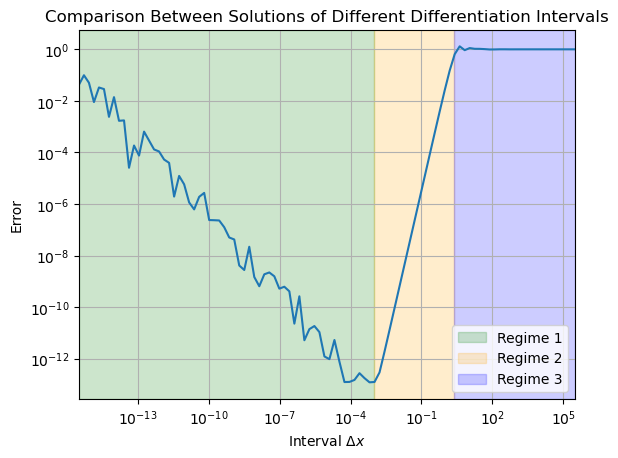

In [108]:
# PLOT

import matplotlib.pyplot as plt

plt.loglog(dxs, errors)

regimes = [dxs[0], 1e-3, 0.25*1e1, dxs[-1]]

plt.axvspan(regimes[0], regimes[1], alpha=0.2, color='green', label='Regime 1')
plt.axvspan(regimes[1], regimes[2], alpha=0.2, color='orange', label='Regime 2')
plt.axvspan(regimes[2], regimes[3], alpha=0.2, color='blue', label='Regime 3')

plt.xlabel("Interval $\\Delta x$")
plt.ylabel("Error")
plt.xlim(dxs[0], dxs[-1])

plt.title(f"Comparison Between Solutions of Different Differentiation Intervals")
plt.legend(loc='lower right')
plt.grid()
plt.show()

- **Regime 1:** Same as regime 1 before.
- **Regime 2:** Same as before and same difference from regime 2 as regime 2 is different from 1: Regime 2 starts on a bigger interval, allowing us to increase the interval a bit within regime 1 and still have small errors.
- **Regime 3:** Same as before.